# **Exploración de Datos**
## Desarrollado por Jesus David Gomez Osorno
## Universidad de Antioquia

## Funciones graficadoras

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

def diagrama_distribucion(data):
  matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
  fig = plt.figure(figsize=(15,8))
  plt.hist(data, bins = 'fd', alpha=0.7, color='green', ec="green") # fd = regla de Freedman-Diaconis
  plt.xlim(data.min(), data.max()) # Límita el valor mínimo y máximo en eje x de la gráfica
  plt.xlabel('Valores')
  plt.ylabel('Frecuencias')
  plt.title(AREA_SEMBRADA)
  plt.show()

In [ ]:
import seaborn as sns # Librería de visualización para data science

def diagrama_blox_plot(data):
  sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
  sns.set(style="whitegrid") # Estilo de la figura
  sns.boxplot(data = data, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización Min-Max

## 1. Análisis de la base da datos

In [ ]:
CODIGO_DEPARTAMENTO = 'CODIGO_DEPARTAMENTO'
DEPARTAMENTO = 'DEPARTAMENTO'
CODIGO_MUNICIPIO = 'CODIGO_MUNICIPIO'
MUNICIPIO = 'MUNICIPIO'
GRUPO_CULTIVO = 'GRUPO_CULTIVO'
SUBGRUPO_CULTIVO = 'SUBGRUPO_CULTIVO'
CULTIVO = 'CULTIVO'
SISTEMA_PRODUCTIVO = 'SISTEMA_PRODUCTIVO'
ANIO = 'ANIO'
PERIODO = 'PERIODO'
AREA_SEMBRADA = 'AREA_SEMBRADA'
AREA_COSECHADA = 'AREA_COSECHADA'
PRODUCCION = 'PRODUCCION'
RENDIMIENTO = 'RENDIMIENTO'
ESTADO_FISICO_PRODUCCION = 'ESTADO_FISICO_PRODUCCION'
NOMBRE_CIENTIFICO = 'NOMBRE_CIENTIFICO'
CICLO_CULTIVO = 'CICLO_CULTIVO'

In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=10Tf2VY2nmYaE1jj1I2ZKBAAVEnrwvpcb'
data_before = pd.read_csv(url, header = None, index_col= False, names = [CODIGO_DEPARTAMENTO,
                                                                                            DEPARTAMENTO,
                                                                                            CODIGO_MUNICIPIO,
                                                                                            MUNICIPIO,
                                                                                            GRUPO_CULTIVO,
                                                                                            SUBGRUPO_CULTIVO,
                                                                                            CULTIVO,
                                                                                            SISTEMA_PRODUCTIVO,
                                                                                            ANIO,
                                                                                            PERIODO,
                                                                                            AREA_SEMBRADA,
                                                                                            AREA_COSECHADA,
                                                                                            PRODUCCION,
                                                                                            RENDIMIENTO,
                                                                                            ESTADO_FISICO_PRODUCCION,
                                                                                            NOMBRE_CIENTIFICO,
                                                                                            CICLO_CULTIVO
                                                                                          ])
data_before = data_before.drop([0],axis=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,8,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206068 entries, 1 to 206068
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CODIGO_DEPARTAMENTO       206068 non-null  object
 1   DEPARTAMENTO              206068 non-null  object
 2   CODIGO_MUNICIPIO          206068 non-null  object
 3   MUNICIPIO                 206067 non-null  object
 4   GRUPO_CULTIVO             206068 non-null  object
 5   SUBGRUPO_CULTIVO          206068 non-null  object
 6   CULTIVO                   206068 non-null  object
 7   SISTEMA_PRODUCTIVO        206068 non-null  object
 8   ANIO                      206068 non-null  object
 9   PERIODO                   206068 non-null  object
 10  AREA_SEMBRADA             206068 non-null  object
 11  AREA_COSECHADA            206068 non-null  object
 12  PRODUCCION                206068 non-null  object
 13  RENDIMIENTO               202635 non-null  object
 14  ESTA

### Características de la base de datos



La base de datos cuenta con 17 características, donde tenemos que algunas son **númericas(Número)** y otras son **categoricas(Texto simple)**.




1.   **CODIGO_DEPARTAMENTO(Número):** Código del departamento, según lo establecido por el DANE
2.   **DEPARTAMENTO(Texto simple)**: Departamento Colombiano
3.   **CODIGO_MUNICIPIO(Texto simple)**: Departamento Colombiano
4.   **MUNICIPIO(Texto simple)**: Departamento Colombiano
5.   **GRUPO_CULTIVO(Texto simple)**: Categoria del cultivo
6.   **SUBGRUPO_CULTIVO(Texto simple)**: Tipo de cultivo según categoria
7.   **CULTIVO(Texto simple)**: Nombre del cultivo
8.   **SISTEMA_PRODUCTIVO(Texto simple)**: Nombre generico del cultivo
9.   **ANIO(Número)**: Año de producción
10.   **PERIODO(Texto simple)**: Periodo medico
11.   **AREA_SEMBRADA(Número)**: Area sembrada en hectáreas
12.   **AREA_COSECHADA(Número)**: Area cosechada en hectáreas
13.   **PRODUCCION(Número)**: Toneladas producidas
14.   **RENDIMIENTO(Número)**: Rendimiento de la cosecha *(PRODUCCION/AREA_COSECHADA)*
15.   **ESTADO_FISICO_PRODUCCION(Texto simple)**: Estado del producto
16.   **NOMBRE_CIENTIFICO(Texto simple)**: Nombre cientifico del cultivo
17.   **CICLO_CULTIVO(Texto simple)**: Ciclo del cultivo en el país



Nuestra caracteristica objetivo o a predecir será **AREA_SEMBRADA**

### Datos de la base de datos


Se tienen **206068** datos, lo cual es una cantidad razonable de registros con los cuales se puede trabajar, podemos observar que a algunas columnas le hacen faltan datos, este problema lo resolveremos más adelante con la imputación de datos.

In [ ]:
data_before.head()

,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,CULTIVO,SISTEMA_PRODUCTIVO,ANIO,PERIODO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
1,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
5,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


## 2. Eliminación de columnas 

### Eliminación de columnas

Luego de analisar las características, se decidio eliminar las siguientes: 

*   **CODIGO_DEPARTAMENTO**: Esta característica es un identificador de la característica DEPARTAMENTO.
*   **CODIGO_MUNICIPIO**: Esta característica es un identificador de la característica MUNICIPIO.
*   **PERIODO**: Esta característica nos indica el periodo en el año, pero realizando un breve observación de los datos esta viene igual que la característica de año.
*   **NOMBRE_CIENTIFICO**: Esta característica nos indica el nombre de cultivo pero científico, ya está información ya nos la la característica CULTIVO.
*   **RENDIMIENTO**: Esta característica nos indica la cantidad de hectarias obtenidas por area cosecha, es una operación entre dos columnas por lo tanto para evitar rebundancia en la base de datos, se eliminará.

Lo que puede observar es que estas características como tal no nos sirve para entrenar nuestro futuro modelo, pero sí nos servirá para agregar otras característica que si nos ayude a mejorar nuestro modelo predictivo. 

In [ ]:
data_after = data_before.drop([CODIGO_DEPARTAMENTO, CODIGO_MUNICIPIO, PERIODO, NOMBRE_CIENTIFICO, RENDIMIENTO, ANIO], axis=1)

Por otro lado notamos que algunas otras características son candidatas a eliminarse, como SUBGRUPO_CULTIVO y SISTEMA_PRODUCTIVO, ya que la característica CULTIVO es la que nos da esta dando esta información, más adelante se hará con análisis con una shi-cuadrada

## 3. Relación entre las variables

Ahora se va verificar la relación entre las variables CULTIVO con SUBGRUPO_CULTIVO y SISTEMA_PRODUCTIVO, ya que estas variables se identificaron durante el análisis que poseían los mismo valores en algunos registros. Realizaremos un test de chi-cuadrada para verficar la independencia entre las variables dichas anteriormente.


### Creación de las tablas de contigencia

In [ ]:
from pandas import crosstab

In [ ]:
categorias_cultivo = pd.Categorical(data_after[CULTIVO]).unique()
display(categorias_cultivo)

['ACELGA', 'ACHICORIA', 'MALANGA', 'ACHIRA', 'ACHIOTE', ..., 'VAINILLA', 'YACON', 'YUCA', 'ZANAHORIA', 'ZAPOTE']
Length: 223
Categories (223, object): ['ACELGA', 'ACHICORIA', 'ACHIOTE', 'ACHIRA', ..., 'YUCA', 'ZANAHORIA',
                           'ZAPOTE', 'ÑAME']

In [ ]:
categorias_subgrupo_cultivo = pd.Categorical(data_after[SUBGRUPO_CULTIVO]).unique()
display(categorias_subgrupo_cultivo)

['ACELGA', 'PLANTAS MEDICINALES', 'MALANGA', 'ACHIRA', 'PLANTAS CONDIMENTARIAS', ..., 'UVA', 'YACON', 'YUCA', 'ZANAHORIA', 'ZAPOTE']
Length: 120
Categories (120, object): ['ACELGA', 'ACHIRA', 'AGUACATE', 'AHUYAMA', ..., 'YUCA', 'ZANAHORIA',
                           'ZAPOTE', 'ÑAME']

In [ ]:
categorias_sistema_productivo = pd.Categorical(data_after[SISTEMA_PRODUCTIVO]).unique()
display(categorias_sistema_productivo)

['ACELGA', 'ACHICORIA', 'ACHIN', 'ACHIRA', 'ACHIOTE (BIJA)', ..., 'YUCA INDUSTRIAL', 'ZANAHORIA', 'ZAPOTE', 'ZARAGOZA', 'ZUCCHINI']
Length: 271
Categories (271, object): ['ACELGA', 'ACHICORIA', 'ACHIN', 'ACHIOTE (BIJA)', ..., 'ZUCCHINI',
                           'ÑAME', 'ÑAME DIAMANTE', 'ÑAME ESPINO']

*Para CULTIVO Y SUBGRUPO_CULTIVO:*

In [ ]:
contingencia_cultivo_subgrupo_cultivo = pd.crosstab(data_after[CULTIVO], data_after[SUBGRUPO_CULTIVO])

suma_filas = contingencia_cultivo_subgrupo_cultivo.sum(axis = 1)
suma_filas = pd.DataFrame(suma_filas, columns = ['Suma Filas'])
suma_columna = contingencia_cultivo_subgrupo_cultivo.sum(axis = 0)
suma_columna = pd.DataFrame(suma_columna, columns = ['Suma Columnas'])

contingencia_cultivo_subgrupo_cultivo_total = pd.concat([contingencia_cultivo_subgrupo_cultivo, suma_filas], axis = 1) # Se agrega la suma de filas
contingencia_cultivo_subgrupo_cultivo_total = pd.concat([contingencia_cultivo_subgrupo_cultivo_total, suma_columna.T], axis = 0) # Se agrega la suma de columnas
contingencia_cultivo_subgrupo_cultivo_total = contingencia_cultivo_subgrupo_cultivo_total.fillna(suma_filas.sum()) # Se agrega la suma total
display(contingencia_cultivo_subgrupo_cultivo_total)

,ACELGA,ACHIRA,AGUACATE,AHUYAMA,AJI,AJO,AJONJOLI,ALCACHOFA,ALFALFA,ALGARROBO,...,TOMATE DE ARBOL,TRIGO,ULLUCO,UVA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME,Suma Filas
ACELGA,215,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215.0
ACHICORIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
ACHIOTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63.0
ACHIRA,0,319,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,319.0
AGRAZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9488,0,0,0,9488.0
ZANAHORIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1687,0,0,1687.0
ZAPOTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,270,0,270.0
ÑAME,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1471,1471.0


*Para CULTIVO Y SISTEMA_PRODUCTIVO:*

In [ ]:
contingencia_cultivo_sistema_productivo = pd.crosstab(data_after[CULTIVO], data_after[SISTEMA_PRODUCTIVO])

suma_filas = contingencia_cultivo_sistema_productivo.sum(axis = 1)
suma_filas = pd.DataFrame(suma_filas, columns = ['Suma Filas'])
suma_columna = contingencia_cultivo_sistema_productivo.sum(axis = 0)
suma_columna = pd.DataFrame(suma_columna, columns = ['Suma Columnas'])

contingencia_cultivo_sistema_productivo_total = pd.concat([contingencia_cultivo_sistema_productivo, suma_filas], axis = 1) # Se agrega la suma de filas
contingencia_cultivo_sistema_productivo_total = pd.concat([contingencia_cultivo_sistema_productivo_total, suma_columna.T], axis = 0) # Se agrega la suma de columnas
contingencia_cultivo_sistema_productivo_total = contingencia_cultivo_sistema_productivo_total.fillna(suma_filas.sum()) # Se agrega la suma total
display(contingencia_cultivo_sistema_productivo_total)

,ACELGA,ACHICORIA,ACHIN,ACHIOTE (BIJA),ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,...,YUCA,YUCA INDUSTRIAL,ZANAHORIA,ZAPOTE,ZARAGOZA,ZUCCHINI,ÑAME,ÑAME DIAMANTE,ÑAME ESPINO,Suma Filas
ACELGA,215,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215.0
ACHICORIA,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
ACHIOTE,0,0,0,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63.0
ACHIRA,0,0,0,0,188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,319.0
AGRAZ,0,0,0,0,0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUCA,0,0,0,0,0,0,0,0,0,0,...,9284,204,0,0,0,0,0,0,0,9488.0
ZANAHORIA,0,0,0,0,0,0,0,0,0,0,...,0,0,1687,0,0,0,0,0,0,1687.0
ZAPOTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,270,0,0,0,0,0,270.0
ÑAME,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1282,37,152,1471.0


### Test chi-cuadrada

*Para CULTIVO Y SUBGRUPO_CULTIVO:*

In [ ]:
import numpy as np
from scipy.stats import chisquare 

In [ ]:
tabla_valores_esperados_cultivo_subgrupo_cultivo = []
valores_contingencia = np.asarray(contingencia_cultivo_subgrupo_cultivo_total.values)

for _,m in enumerate(np.arange(0, contingencia_cultivo_subgrupo_cultivo_total.shape[0] - 1)):
  for _,n in enumerate(np.arange(0, contingencia_cultivo_subgrupo_cultivo_total.shape[1] - 1)):
    E = valores_contingencia[m, contingencia_cultivo_subgrupo_cultivo_total.shape[1] - 1] * valores_contingencia[contingencia_cultivo_subgrupo_cultivo_total.shape[0] - 1, n] / contingencia_cultivo_subgrupo_cultivo_total.loc['Suma Columnas','Suma Filas']
    tabla_valores_esperados_cultivo_subgrupo_cultivo.append(E)

tabla_valores_esperados_cultivo_subgrupo_cultivo = np.asarray(tabla_valores_esperados_cultivo_subgrupo_cultivo)
tabla_valores_esperados_cultivo_subgrupo_cultivo = pd.DataFrame(tabla_valores_esperados_cultivo_subgrupo_cultivo.reshape(contingencia_cultivo_subgrupo_cultivo_total.shape[0] - 1,contingencia_cultivo_subgrupo_cultivo_total.shape[1] - 1), index = categorias_cultivo, columns = categorias_subgrupo_cultivo)
display(tabla_valores_esperados_cultivo_subgrupo_cultivo)

,ACELGA,PLANTAS MEDICINALES,MALANGA,ACHIRA,PLANTAS CONDIMENTARIAS,FRUTALES EXOTICOS,AGUACATE,AJI,AHUYAMA,AJO,...,SOYA,TABACO,TRIGO,TOMATE,TOMATE DE ARBOL,UVA,YACON,YUCA,ZANAHORIA,ZAPOTE
ACELGA,0.224319,0.332827,4.738873,2.913019,1.598404,0.337000,0.418381,0.001043,0.039647,0.003130,...,10.072452,2.845202,1.325048,0.210756,0.578013,0.028170,9.899257,1.760123,0.281703,1.534760
ACHICORIA,0.006260,0.009288,0.132248,0.081294,0.044607,0.009405,0.011676,0.000029,0.001106,0.000087,...,0.281092,0.079401,0.036978,0.005882,0.016131,0.000786,0.276258,0.049120,0.007861,0.042831
MALANGA,0.065731,0.097526,1.388600,0.853582,0.468370,0.098749,0.122595,0.000306,0.011618,0.000917,...,2.951463,0.833710,0.388270,0.061756,0.169371,0.008255,2.900712,0.515757,0.082546,0.449720
ACHIRA,0.332827,0.493822,7.031164,4.322107,2.371586,0.500015,0.620761,0.001548,0.058825,0.004644,...,14.944708,4.221485,1.966002,0.312703,0.857610,0.041797,14.687734,2.611531,0.417969,2.277156
ACHIOTE,0.045907,0.068113,0.969816,0.596153,0.327115,0.068968,0.085622,0.000214,0.008114,0.000641,...,2.061339,0.582274,0.271173,0.043131,0.118291,0.005765,2.025894,0.360211,0.057651,0.314090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAINILLA,0.028170,0.041797,0.595114,0.365821,0.200730,0.042321,0.052541,0.000131,0.004979,0.000393,...,1.264913,0.357304,0.166401,0.026467,0.072588,0.003538,1.243162,0.221039,0.035377,0.192737
YACON,9.899257,14.687734,209.127550,128.552206,70.537958,14.871906,18.463265,0.046043,1.749636,0.138129,...,444.499641,125.559408,58.474678,9.300697,25.507852,1.243162,436.856494,77.674632,12.431625,67.729332
YUCA,1.760123,2.611531,37.183619,22.857037,12.541899,2.644278,3.282834,0.008187,0.311091,0.024560,...,79.033610,22.324907,10.397005,1.653697,4.535386,0.221039,77.674632,13.810825,2.210387,12.042515
ZANAHORIA,0.281703,0.417969,5.951142,3.658210,2.007299,0.423210,0.525409,0.001310,0.049789,0.003931,...,12.649126,3.573044,1.664014,0.264670,0.725877,0.035377,12.431625,2.210387,0.353767,1.927373


In [ ]:
chi_valores, p_valores = chisquare(np.asarray(contingencia_cultivo_subgrupo_cultivo.values), f_exp = np.asarray(tabla_valores_esperados_cultivo_subgrupo_cultivo.values), ddof = 0) # ddof son los grados de libertad de la distribución chi-cuadrada

In [ ]:
resultados_cultivo_subgrupo_cultivo = pd.DataFrame(np.array([chi_valores, p_valores]).T, columns = ['valor Chi-Cuadrada', 'Valor p'], index=categorias_subgrupo_cultivo)
display(resultados_cultivo_subgrupo_cultivo)

,valor Chi-Cuadrada,Valor p
ACELGA,205853.0,0.0
PLANTAS MEDICINALES,205749.0,0.0
MALANGA,201526.0,0.0
ACHIRA,203276.0,0.0
PLANTAS CONDIMENTARIAS,204536.0,0.0
...,...,...
UVA,206041.0,0.0
YACON,196580.0,0.0
YUCA,204381.0,0.0
ZANAHORIA,205798.0,0.0


*Para CULTIVO Y SISTEMA_PRODUCTIVO:*

In [ ]:
tabla_valores_esperados_cultivo_sistema_productivo = []
valores_contingencia = np.asarray(contingencia_cultivo_sistema_productivo_total.values)

for _,m in enumerate(np.arange(0, contingencia_cultivo_sistema_productivo_total.shape[0] - 1)):
  for _,n in enumerate(np.arange(0, contingencia_cultivo_sistema_productivo_total.shape[1] - 1)):
    E = valores_contingencia[m, contingencia_cultivo_sistema_productivo_total.shape[1] - 1] * valores_contingencia[contingencia_cultivo_sistema_productivo_total.shape[0] - 1, n] / contingencia_cultivo_sistema_productivo_total.loc['Suma Columnas','Suma Filas']
    tabla_valores_esperados_cultivo_sistema_productivo.append(E)

tabla_valores_esperados_cultivo_sistema_productivo = np.asarray(tabla_valores_esperados_cultivo_sistema_productivo)
tabla_valores_esperados_cultivo_sistema_productivo = pd.DataFrame(tabla_valores_esperados_cultivo_sistema_productivo.reshape(contingencia_cultivo_sistema_productivo_total.shape[0] - 1,contingencia_cultivo_sistema_productivo_total.shape[1] - 1), index = categorias_cultivo, columns = categorias_sistema_productivo)
display(tabla_valores_esperados_cultivo_sistema_productivo)

,ACELGA,ACHICORIA,ACHIN,ACHIRA,ACHIOTE (BIJA),AGRAZ,AGUACATE,AJI,AGUAJE,AHUYAMA,...,UVA CAIMARONA,VAINILLA,YACON,YOTA,YUCA,YUCA INDUSTRIAL,ZANAHORIA,ZAPOTE,ZARAGOZA,ZUCCHINI
ACELGA,0.224319,0.006260,0.191975,0.065731,0.196149,0.045907,4.738873,0.018780,2.913019,1.423122,...,0.013563,9.686414,0.212842,1.760123,0.281703,0.002087,0.008347,1.337568,0.038604,0.158588
ACHICORIA,0.006260,0.000175,0.005357,0.001834,0.005474,0.001281,0.132248,0.000524,0.081294,0.039715,...,0.000379,0.270319,0.005940,0.049120,0.007861,0.000058,0.000233,0.037327,0.001077,0.004426
MALANGA,0.065731,0.001834,0.056253,0.019261,0.057476,0.013452,1.388600,0.005503,0.853582,0.417008,...,0.003974,2.838345,0.062368,0.515757,0.082546,0.000611,0.002446,0.391939,0.011312,0.046470
ACHIRA,0.332827,0.009288,0.284838,0.097526,0.291030,0.068113,7.031164,0.027865,4.322107,2.111517,...,0.020124,14.371935,0.315799,2.611531,0.417969,0.003096,0.012384,1.984578,0.057277,0.235301
ACHIOTE,0.045907,0.001281,0.039288,0.013452,0.040142,0.009395,0.969816,0.003843,0.596153,0.291244,...,0.002776,1.982336,0.043558,0.360211,0.057651,0.000427,0.001708,0.273735,0.007900,0.032455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAINILLA,0.028170,0.000786,0.024109,0.008255,0.024633,0.005765,0.595114,0.002358,0.365821,0.178718,...,0.001703,1.216433,0.026729,0.221039,0.035377,0.000262,0.001048,0.167974,0.004848,0.019916
YACON,9.899257,0.276258,8.471922,2.900712,8.656094,2.025894,209.127550,0.828775,128.552206,62.802725,...,0.598560,427.463711,9.392783,77.674632,12.431625,0.092086,0.368344,59.027195,1.703593,6.998544
YUCA,1.760123,0.049120,1.506338,0.515757,1.539084,0.360211,37.183619,0.147359,22.857037,11.166547,...,0.106426,76.004562,1.670070,13.810825,2.210387,0.016373,0.065493,10.495244,0.302905,1.244366
ZANAHORIA,0.281703,0.007861,0.241085,0.082546,0.246326,0.057651,5.951142,0.023584,3.658210,1.787177,...,0.017033,12.164334,0.267290,2.210387,0.353767,0.002620,0.010482,1.679737,0.048479,0.199158


In [ ]:
chi_valores, p_valores = chisquare(np.asarray(contingencia_cultivo_sistema_productivo.values), f_exp = np.asarray(tabla_valores_esperados_cultivo_sistema_productivo.values), ddof = 0) # ddof son los grados de libertad de la distribución chi-cuadrada

In [ ]:
resultados_cultivo_sistema_productivo = pd.DataFrame(np.array([chi_valores, p_valores]).T, columns = ['valor Chi-Cuadrada', 'Valor p'], index=categorias_sistema_productivo)
display(resultados_cultivo_sistema_productivo)

,valor Chi-Cuadrada,Valor p
ACELGA,205853.000000,0.0
ACHICORIA,206062.000000,0.0
ACHIN,59621.223975,0.0
ACHIRA,206005.000000,0.0
ACHIOTE (BIJA),121256.463950,0.0
...,...,...
YUCA INDUSTRIAL,26.049820,1.0
ZANAHORIA,20859.645570,0.0
ZAPOTE,178309.554045,0.0
ZARAGOZA,5146.219579,0.0


### Prueba de hipotesis 

*para CULTIVO Y SUBGRUPO_CULTIVO*

*   $H_0$: “La categoria de SUBGRUPO_CULTIVO es *independiente* de las categorias de CULTIVO”.
*   $H_A$: “La categoria de SUBGRUPO_CULTIVO es *dependiente* de las categorias de CULTIVO”.

$$p_{value} < 0.05 \, \rightarrow\, Aceptar\, H_A$$
$$p_{value} \geq 0.05 \, \rightarrow\, Aceptar\, H_0$$

In [ ]:
resultados_cultivo_subgrupo_cultivo[resultados_cultivo_subgrupo_cultivo['Valor p'] >= 0.05]

,valor Chi-Cuadrada,Valor p


Considerando que todos casos de la tabla de resultados del test chi-cuadrado generan un valor p igual o cercano  0, hay evidencias para rechazar $H_0$ y afirmar que las categorias de SUBGRUPO_CULTIVO son *dependientes* de las categorias de CULTIVO

*Para CULTIVO Y SISTEMA_PRODUCTIVO:*

*   $H_0$: “La categoria de SISTEMA_PRODUCTIVO es *independiente* de las categorias de CULTIVO”.
*   $H_A$: “La categoria de SISTEMA_PRODUCTIVO es *dependiente* de las categorias de CULTIVO”.

$$p_{value} < 0.05 \, \rightarrow\, Aceptar\, H_A$$
$$p_{value} \geq 0.05 \, \rightarrow\, Aceptar\, H_0$$

In [ ]:
resultados_cultivo_sistema_productivo[resultados_cultivo_sistema_productivo['Valor p'] >= 0.05]

,valor Chi-Cuadrada,Valor p
YUCA INDUSTRIAL,26.04982,1.0


Considerando que la mayoría de casos de la tabla de resultados del test chi-cuadrado generan un valor p igual o cercano 0, hay evidencias para rechazar $H_0$ y afirmar que las categorias de SISTEMA_PRODUCTIVO son *dependientes* de las categorias de CULTIVO

Ahora que ya hay con respaldar la eliminación de esta dos características, se procede con ello:

In [ ]:
data_after = data_after.drop([SUBGRUPO_CULTIVO, SISTEMA_PRODUCTIVO], axis=1)

In [ ]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206068 entries, 1 to 206068
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DEPARTAMENTO              206068 non-null  object
 1   MUNICIPIO                 206067 non-null  object
 2   GRUPO_CULTIVO             206068 non-null  object
 3   CULTIVO                   206068 non-null  object
 4   AREA_SEMBRADA             206068 non-null  object
 5   AREA_COSECHADA            206068 non-null  object
 6   PRODUCCION                206068 non-null  object
 7   ESTADO_FISICO_PRODUCCION  206068 non-null  object
 8   CICLO_CULTIVO             206068 non-null  object
dtypes: object(9)
memory usage: 15.7+ MB


Finalmente hemos quedado con 9 caracteristicas de las 17 que teniamos inicialmente, ahora se procede a codificarlas características que lo requieran.

In [ ]:
data_after.head()

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
1,BOYACA,BUSBANZA,HORTALIZAS,ACELGA,2,1,1,FRUTO FRESCO,TRANSITORIO
2,CUNDINAMARCA,SOACHA,HORTALIZAS,ACELGA,82,80,1440,FRUTO FRESCO,TRANSITORIO
3,CUNDINAMARCA,COTA,HORTALIZAS,ACELGA,2,2,26,FRUTO FRESCO,TRANSITORIO
4,NORTE DE SANTANDER,LOS PATIOS,HORTALIZAS,ACELGA,3,3,48,FRUTO FRESCO,TRANSITORIO
5,NORTE DE SANTANDER,PAMPLONA,HORTALIZAS,ACELGA,1,1,5,FRUTO FRESCO,TRANSITORIO


## Imputacion de datos

### Eliminación de datos con area sembrada igual a 0

In [ ]:
data_after[AREA_SEMBRADA] = data_after[AREA_SEMBRADA].astype(np.float32)
data_after[AREA_COSECHADA] = data_after[AREA_COSECHADA].astype(np.float32)
data_after[PRODUCCION] = data_after[PRODUCCION].astype(np.float32)

In [ ]:
data_after[AREA_SEMBRADA].describe()

count    206068.000000
mean        291.068634
std        1153.626709
min           0.000000
25%          10.000000
50%          35.000000
75%         151.000000
max       47403.000000
Name: AREA_SEMBRADA, dtype: float64

In [ ]:
data_after[DEPARTAMENTO].count()

206068

In [ ]:
data_after = data_after[data_after[AREA_SEMBRADA] > 0] 
print('Datos eliminados', 206068 - 205347)

Datos eliminados 721


In [ ]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205347 entries, 1 to 206068
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DEPARTAMENTO              205347 non-null  object 
 1   MUNICIPIO                 205346 non-null  object 
 2   GRUPO_CULTIVO             205347 non-null  object 
 3   CULTIVO                   205347 non-null  object 
 4   AREA_SEMBRADA             205347 non-null  float32
 5   AREA_COSECHADA            205347 non-null  float32
 6   PRODUCCION                205347 non-null  float32
 7   ESTADO_FISICO_PRODUCCION  205347 non-null  object 
 8   CICLO_CULTIVO             205347 non-null  object 
dtypes: float32(3), object(6)
memory usage: 13.3+ MB


### imputacion de datos

Como se puede observa, luego de la eliminación de las columnas anteriores aún quedan algunas características tienen datos faltantes:

*   MUNICIPIO: Para esta característica solo 1 registro tiene un valor nulo, se buscara en la base de datos con el id para intentar rellenar este campo faltante.

Se uso la base de datos sin las columnas eliminadas para ver si el registro que tiene el municipio nulo, tienen el id del municipio para luego rellenar ese valor con el nombre de ese municipio.

In [ ]:
data_before[data_before[MUNICIPIO].isnull()]

,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,CULTIVO,SISTEMA_PRODUCTIVO,ANIO,PERIODO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
336,27,CHOCO,27077,NaN,TUBERCULOS Y PLATANOS,MALANGA,MALANGA,ACHIN,2015,2015,180,180,2880,16,TUBERCULO FRESCO,COLOCASIA ESCULENTA,ANUAL


In [ ]:
data_before[data_before[CODIGO_MUNICIPIO] == 27077]

,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,MUNICIPIO,GRUPO_CULTIVO,SUBGRUPO_CULTIVO,CULTIVO,SISTEMA_PRODUCTIVO,ANIO,PERIODO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,RENDIMIENTO,ESTADO_FISICO_PRODUCCION,NOMBRE_CIENTIFICO,CICLO_CULTIVO
33938,27,CHOCO,27077,BAJO BAUDO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2011,2011,94,10,3,0.3,GRANO SECO,THEOBROMA CACAO,PERMANENTE
34441,27,CHOCO,27077,BAJO BAUDO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2012,2012,144,50,15,0.3,GRANO SECO,THEOBROMA CACAO,PERMANENTE
34945,27,CHOCO,27077,BAJO BAUDO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2013,2013,144,94,28,0.3,GRANO SECO,THEOBROMA CACAO,PERMANENTE
35470,27,CHOCO,27077,BAJO BAUDO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2014,2014,164,144,43,0.3,GRANO SECO,THEOBROMA CACAO,PERMANENTE
35990,27,CHOCO,27077,BAJO BAUDO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2015,2015,184,158,47,0.3,GRANO SECO,THEOBROMA CACAO,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200222,27,CHOCO,27077,BAJO BAUDO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2014,2014,128,128,769,6.01,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
201013,27,CHOCO,27077,BAJO BAUDO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2015,2015,200,198,1584,8.0,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
201831,27,CHOCO,27077,BAJO BAUDO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2016,2016,20,20,140,7.0,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL
202618,27,CHOCO,27077,BAJO BAUDO,TUBERCULOS Y PLATANOS,YUCA,YUCA,YUCA,2017,2017,60,50,400,8.0,TUBERCULO FRESCO,MANIHOT ESCULENTA,ANUAL


Como podemos ver el municipio con ese id corresponde al BAJO BAUDO

In [ ]:
data_after[MUNICIPIO] = data_after[MUNICIPIO].fillna('BAJO BAUDO')

Luego de realizar la operación los resultado obtenidos fueron:

In [ ]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205347 entries, 1 to 206068
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DEPARTAMENTO              205347 non-null  object 
 1   MUNICIPIO                 205347 non-null  object 
 2   GRUPO_CULTIVO             205347 non-null  object 
 3   CULTIVO                   205347 non-null  object 
 4   AREA_SEMBRADA             205347 non-null  float32
 5   AREA_COSECHADA            205347 non-null  float32
 6   PRODUCCION                205347 non-null  float32
 7   ESTADO_FISICO_PRODUCCION  205347 non-null  object 
 8   CICLO_CULTIVO             205347 non-null  object 
dtypes: float32(3), object(6)
memory usage: 13.3+ MB


Ya nuestra base de datos quedo sin datos nulos

## Distribucion de las caracteristicas

In [ ]:
data_numerica = data_after[[DEPARTAMENTO, MUNICIPIO, GRUPO_CULTIVO, CULTIVO, ESTADO_FISICO_PRODUCCION, CICLO_CULTIVO]]
data_numerica.describe()

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
count,205347,205347,205347,205347,205347,205347
unique,32,1018,13,221,23,3
top,BOYACA,BOLIVAR,FRUTALES,MAIZ,FRUTO FRESCO,TRANSITORIO
freq,20539,1000,50123,24951,59561,108396


In [ ]:
data_numerica = data_after[[AREA_SEMBRADA, AREA_COSECHADA, PRODUCCION]]
data_numerica.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION
count,205347.00000,205347.00000,205347.00000
mean,292.09061,250.28154,2800.00391
std,1155.54773,982.07385,45143.62500
min,1.00000,0.00000,0.00000
25%,10.00000,8.00000,32.00000
50%,35.00000,30.00000,144.00000
75%,153.00000,130.00000,650.00000
max,47403.00000,38600.00000,4546116.00000


## 4. Codificación de características

Actualmente tenemos las siguientes características categoricas:
* DEPARTAMENTO
* MUNICIPIO
* GRUPO_CULTIVO
* CULTIVO
* ESTADO_FISICO_PRODUCCION
* CICLO_CULTIVO

### Elección del método de codificación

In [ ]:
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
from collections import defaultdict 

LE = defaultdict(LabelEncoder)

*para DEPARTAMENTO*

In [ ]:
data_after[DEPARTAMENTO] = LE[DEPARTAMENTO].fit_transform(data_after[DEPARTAMENTO])

*Para MUNICIPIO*

In [ ]:
data_after[MUNICIPIO] = LE[MUNICIPIO].fit_transform(data_after[MUNICIPIO])

*Para GRUPO_CULTIVO*

In [ ]:
data_after[GRUPO_CULTIVO] = LE[GRUPO_CULTIVO].fit_transform(data_after[GRUPO_CULTIVO])

*Para CULTIVO*

In [ ]:
data_after[CULTIVO] = LE[CULTIVO].fit_transform(data_after[CULTIVO])

*Para ESTADO_FISICO_PRODUCCION*

In [ ]:
data_after[ESTADO_FISICO_PRODUCCION] = LE[ESTADO_FISICO_PRODUCCION].fit_transform(data_after[ESTADO_FISICO_PRODUCCION])

*Para CICLO_CULTIVO*

In [ ]:
data_after[CICLO_CULTIVO] = LE[CICLO_CULTIVO].fit_transform(data_after[CICLO_CULTIVO])

Luego de observar la cantidad de categorías que tenia cada característica categórica, se decidió ir por un label encoder, para evitar que nuestras características crezcan en gran proporción debido a otros métodos de codificación

### Base de datos

In [ ]:
data_after.head()

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
1,5,114,6,0,2.0,1.0,1.0,7,2
2,13,849,6,0,82.0,80.0,1440.0,7,2
3,13,230,6,0,2.0,2.0,26.0,7,2
4,21,475,6,0,3.0,3.0,48.0,7,2
5,21,601,6,0,1.0,1.0,5.0,7,2


In [ ]:
data_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205347 entries, 1 to 206068
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DEPARTAMENTO              205347 non-null  int64  
 1   MUNICIPIO                 205347 non-null  int64  
 2   GRUPO_CULTIVO             205347 non-null  int64  
 3   CULTIVO                   205347 non-null  int64  
 4   AREA_SEMBRADA             205347 non-null  float32
 5   AREA_COSECHADA            205347 non-null  float32
 6   PRODUCCION                205347 non-null  float32
 7   ESTADO_FISICO_PRODUCCION  205347 non-null  int64  
 8   CICLO_CULTIVO             205347 non-null  int64  
dtypes: float32(3), int64(6)
memory usage: 13.3 MB


Finalmente, se cambia los tipos de datos de la base de dato de object a float32

In [ ]:
data_after[AREA_SEMBRADA] = data_after[AREA_SEMBRADA].astype(np.float32)
data_after[AREA_COSECHADA] = data_after[AREA_COSECHADA].astype(np.float32)
data_after[PRODUCCION] = data_after[PRODUCCION].astype(np.float32)

In [ ]:
data_after.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
count,205347.00000,205347.00000,205347.00000,205347.00000,205347.00000,205347.00000,205347.00000,205347.00000,205347.00000
mean,14.96199,506.63010,5.79245,113.64990,292.09061,250.28154,2800.00391,10.34910,1.45741
std,9.11590,295.38992,3.79317,63.86404,1155.54773,982.07385,45143.62500,5.32256,0.62379
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,6.00000,253.00000,4.00000,52.00000,10.00000,8.00000,32.00000,7.00000,1.00000
50%,16.00000,505.00000,6.00000,128.00000,35.00000,30.00000,144.00000,8.00000,2.00000
75%,22.00000,760.00000,9.00000,163.00000,153.00000,130.00000,650.00000,12.00000,2.00000
max,31.00000,1017.00000,12.00000,220.00000,47403.00000,38600.00000,4546116.00000,22.00000,2.00000


##Distribución de los datos

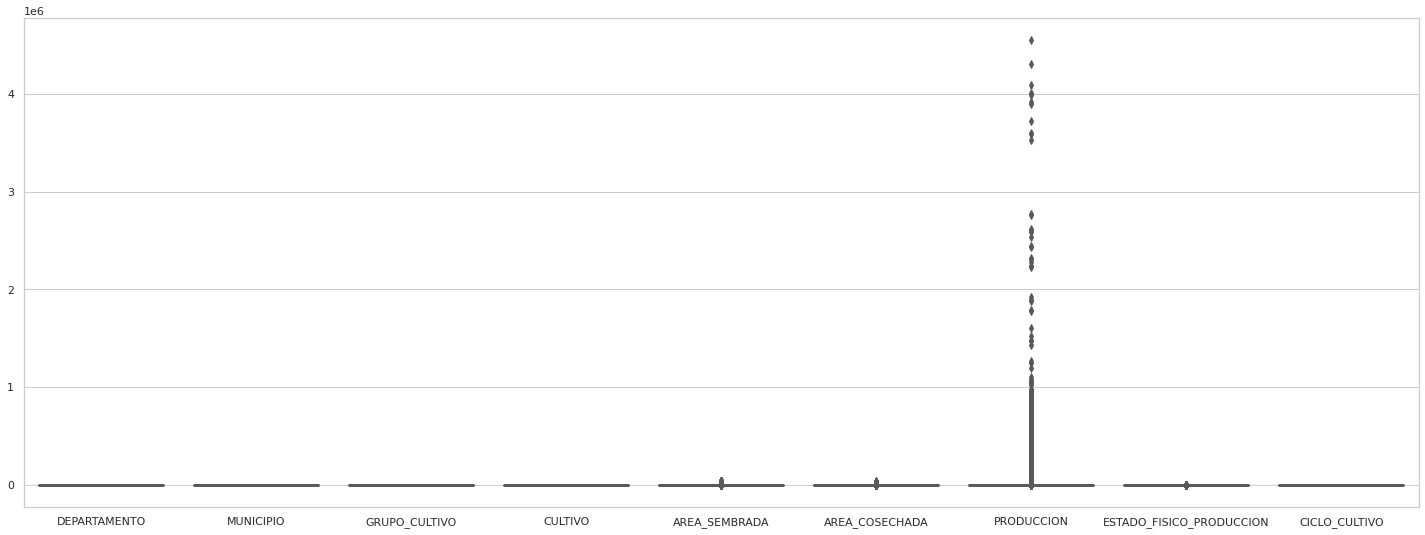

In [ ]:
diagrama_blox_plot(data_after)

##Partición de datos por AREA_SEMBRADA

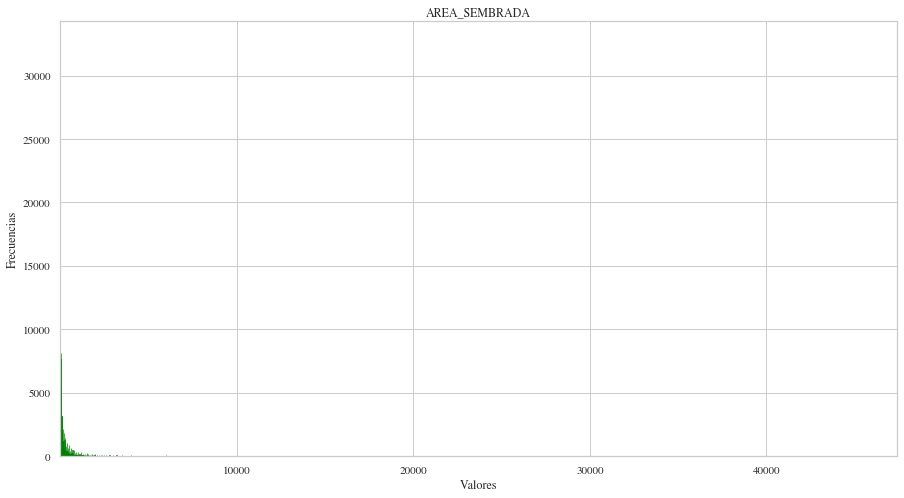

In [ ]:
diagrama_distribucion(data_after[AREA_SEMBRADA])

### Grandes agricultores

In [ ]:
data_grandes = data_after[data_after[AREA_SEMBRADA] > 10] #grandes agricultores
len(data_grandes)

148954

In [ ]:
data_grandes.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
count,148954.00000,148954.00000,148954.00000,148954.00000,148954.00000,148954.00000,148954.00000,148954.00000,148954.00000
mean,14.84309,507.68743,5.82197,111.36312,400.72195,343.32376,3842.20752,10.34739,1.41985
std,9.10017,295.21000,4.09648,63.59382,1340.79749,1139.24622,52953.03125,5.66789,0.63116
min,0.00000,0.00000,0.00000,0.00000,11.00000,0.00000,0.00000,0.00000,0.00000
25%,6.00000,252.00000,4.00000,50.00000,30.00000,23.00000,90.00000,7.00000,1.00000
50%,13.00000,510.00000,6.00000,130.00000,79.00000,63.00000,300.00000,8.00000,1.00000
75%,22.00000,760.00000,9.00000,160.00000,269.00000,221.75000,1122.00000,12.00000,2.00000
max,31.00000,1017.00000,12.00000,220.00000,47403.00000,38600.00000,4546116.00000,22.00000,2.00000


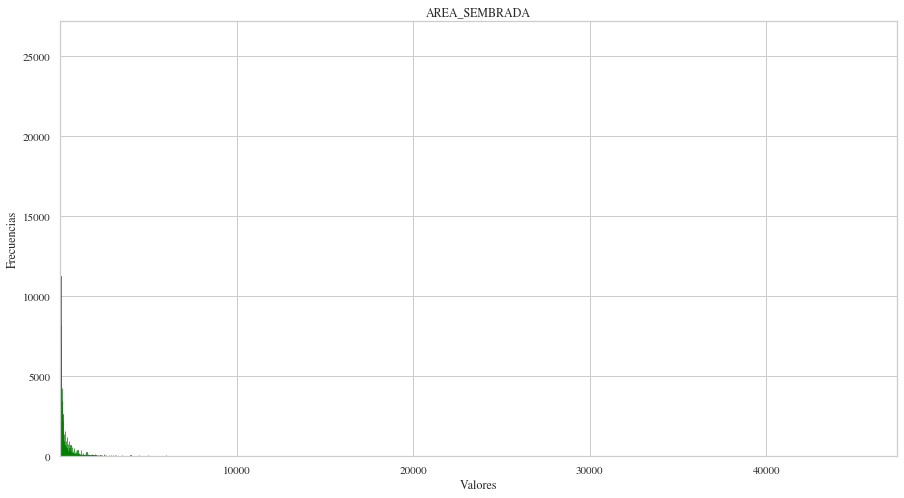

In [ ]:
diagrama_distribucion(data_grandes[AREA_SEMBRADA])

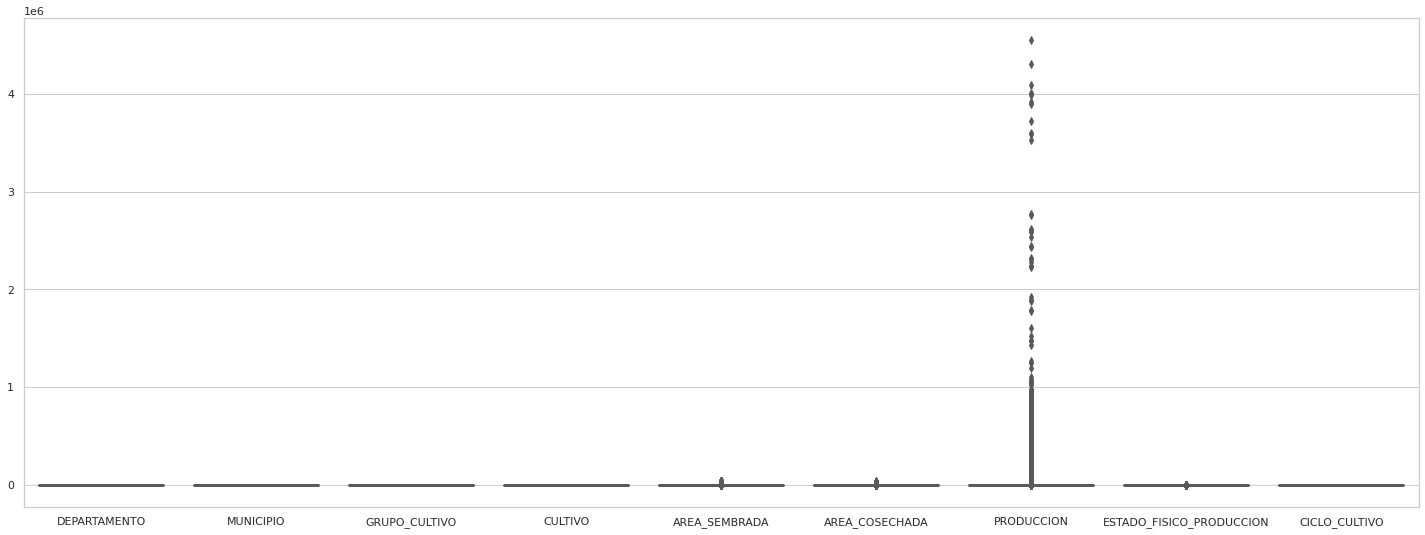

In [ ]:
diagrama_blox_plot(data_grandes)

### Medianos agricultores

In [ ]:
data_medianos = data_after[data_after[AREA_SEMBRADA] < 11] #grandes agricultores
len(data_medianos)

56393

In [ ]:
data_medianos.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,DEPARTAMENTO,MUNICIPIO,GRUPO_CULTIVO,CULTIVO,AREA_SEMBRADA,AREA_COSECHADA,PRODUCCION,ESTADO_FISICO_PRODUCCION,CICLO_CULTIVO
count,56393.00000,56393.00000,56393.00000,56393.00000,56393.00000,56393.00000,56393.00000,56393.00000,56393.00000
mean,15.27606,503.83734,5.71449,119.69009,5.25893,4.61274,48.80558,10.35363,1.55661
std,9.14997,295.84908,2.83887,64.18226,2.93314,2.89016,89.88070,4.27847,0.59254
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,6.00000,254.00000,4.00000,66.00000,3.00000,2.00000,7.00000,7.00000,1.00000
50%,16.00000,487.00000,6.00000,125.00000,5.00000,4.00000,20.00000,8.00000,2.00000
75%,23.00000,759.00000,7.00000,169.00000,8.00000,7.00000,57.00000,12.00000,2.00000
max,31.00000,1017.00000,12.00000,220.00000,10.00000,26.00000,1900.00000,22.00000,2.00000


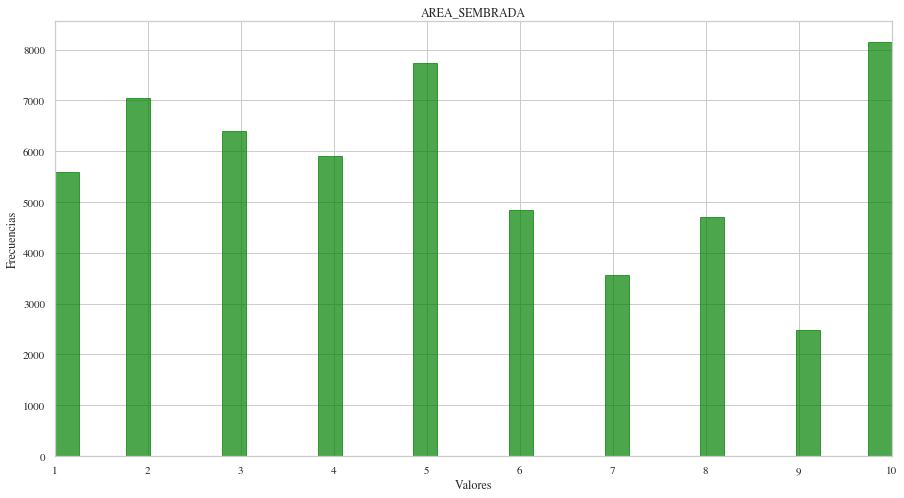

In [ ]:
diagrama_distribucion(data_medianos[AREA_SEMBRADA])

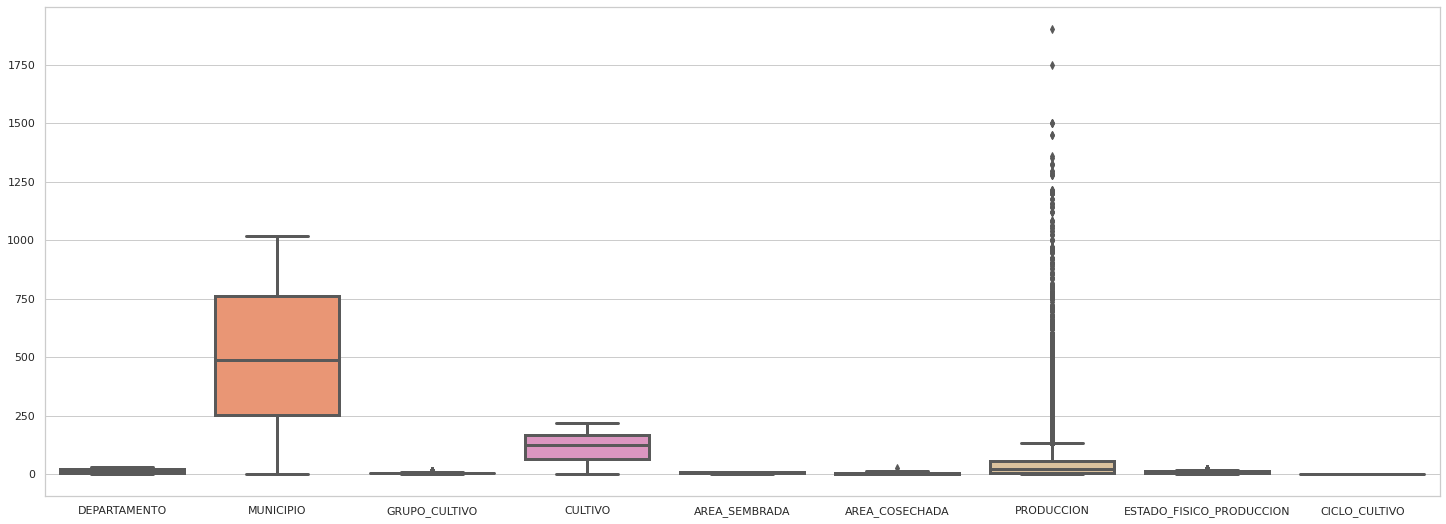

In [ ]:
diagrama_blox_plot(data_medianos)

## Guardado del label enconder y guardado de datos

### Guardar el label enconder

### Guardado de las bases de datos

In [ ]:
RUTA_DATA = '/content/drive/MyDrive/Monografía/data/originales'

In [ ]:
columns_vec = [DEPARTAMENTO, MUNICIPIO,GRUPO_CULTIVO, CULTIVO, AREA_SEMBRADA, AREA_COSECHADA, PRODUCCION, ESTADO_FISICO_PRODUCCION, CICLO_CULTIVO]
separator = ', '
columns = separator.join(columns_vec)
columns

'DEPARTAMENTO, MUNICIPIO, GRUPO_CULTIVO, CULTIVO, AREA_SEMBRADA, AREA_COSECHADA, PRODUCCION, ESTADO_FISICO_PRODUCCION, CICLO_CULTIVO'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
np.savetxt(RUTA_DATA + '/medianos_agricultores.csv', data_medianos, delimiter=',', header=columns)

In [ ]:
np.savetxt(RUTA_DATA + '/grandes_agricultores.csv', data_grandes, delimiter=',', header=columns)